# Answers

You can edit this Jupyter notebook to include your answers and run any code that generates those answers or produces plots.  You can add additional cells for code or markdown as needed.

This homework is primarily about running simulations involving initial value problems (IVPs) and a simple PDE.

In [ ]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
from scipy.integrate import DenseOutput
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import scipy.sparse as sparse
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols
from scipy.integrate import solve_ivp
import importlib

https://uchi-compy23.github.io/notes/04_functions/ode_initial

## Problem 0 (30 points)

In this problem, you will implement a custom ODE solver for `solve_ivp` based on the Forward Euler method, and implement some basic tests.

### Part A (20 points)
If you read the [documentation for `solve_ipv`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html), which we used in class, you'll see that you can write your own solver.

Write a solver for the forward Euler method, which is not implemented as one of the available solvers (while simple, it typically is not very accurate).  Recall, this is the basic rule:
\begin{equation}
y(t + h) = y(t) + h f(t, y)
\end{equation}

Your solver should be a class which is derived from [`scipy.integrate.OdeSolver`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.OdeSolver.html#scipy.integrate.OdeSolver)
```python
class ForwardEuler(scipy.integrate.OdeSolver):
    pass
```

Your class definition should go in [`euler.py`](euler.py)

You should read the documentation for this base class in order to implement `ForwardEuler`.  Here are some hints/notes:
* Allow a user to set `h` using a keyword argument.  This can be passed using `solve_ivp(..., method=ForwardEuler, h=0.01)` to set `h=0.01`
* Use a default step size `h = (t_bound - t0) / 100`
* private methods begin with an underscore "_"
* the method `_dense_output_impl(self)` should output a `ForwardEulerOutput` (defined in [`euler.py`](euler.py))
* direction should be `+1`
* You won't use a Jacobian, so `njev` and `nlu` can remain at 0.
* You may want to consider using `super(ForwardEuler, self).__init__`
* You may want to read the source code for the parent class [here](https://github.com/scipy/scipy/blob/v1.5.3/scipy/integrate/_ivp/base.py#L25-L214)

---

*put any discussion here*

My class definition (hw0 asnwer) is in [`euler.py`].
Below is just some code from lecture material for my own reference.

In [3]:
from euler import ForwardEuler
from sympy.abc import x # x is overwritten in previous cells so we need to import here

In [4]:
## lecturen notes
import sympy as sym
from sympy.solvers import ode

a, t = sym.symbols('a t') # symbol
y = sym.Function('y') # symbolic function
eqn = y(t).diff(t) - a * y(t) # eqn = 0
eqn

ode.classify_ode(eqn)

('separable',
 '1st_exact',
 '1st_linear',
 'Bernoulli',
 'almost_linear',
 '1st_power_series',
 'lie_group',
 'nth_linear_constant_coeff_homogeneous',
 'separable_Integral',
 '1st_exact_Integral',
 '1st_linear_Integral',
 'Bernoulli_Integral',
 'almost_linear_Integral')

In [4]:
## lecture notes
ode.dsolve(eqn, hint='separable') # we solve the differential equation using the hinted method

Eq(y(t), C1*exp(a*t))

In [5]:
## lecture note - Euler's Method
def forward_euler(f, y0, t0=0, h=1e-2, n=100):
    """
    compute n forward euler steps
    """
    y = [y0]
    t = [t0]
    for k in range(n-1):
        fk = f(t[-1], y[-1])
        y.append(y[-1] + h*fk)
        t.append(t[-1]+h)
        
    return np.array(y), np.array(t)

In [6]:
## lecture note - Euler's Method

f = lambda t, y : y * (1 - y)

y, t = forward_euler(f, 0.1, h=1e-1, n=100)

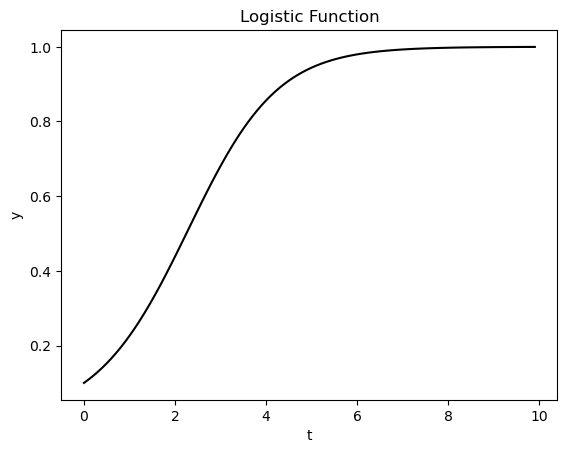

In [7]:
## lecture note - Euler's Method
plt.plot(t, y, c='k')
plt.title("Logistic Function")
plt.ylabel("y")
plt.xlabel("t")
plt.show()

### Part B (10 points)

Use your `ForwardEuler` solver and `solve_ivp` to solve an IVP $y'(t) = y$ with $y(0) = 1$ on the domain $t\in [0,5]$, using a step size `h=0.01`.  Make a plot of the solution to this IVP with axes labeled `y` and `x`.

Use SymPy to obtain the ground-truth solution to this IVP.  What is the largest error you see on the domain you solved the problem?  Try solving with the default solver in `solve_ivp`.  What is the largest error in this case?

---

*put your answers here*

The initial value problem (IVP) $y'(t) = y$ with $y(0) = 1$ was solved on the domain $t \in [0,5]$ using two different methods.

1. Ground-Truth Solution: Using SymPy, the analytical (ground-truth) solution to this IVP was found to be:$$y(t) = e^t$$

2. Solver Comparison: The plot I generated compares the results of our custom ForwardEuler solver, the default solve_ivp solver, and the true solution. (Note: The plot correctly uses t for the horizontal axis, as it's the independent variable in the problem, rather than x as mentioned in the prompt).

3. Error Analysis: The largest absolute error for each method on the domain $[0, 5]$ was calculated:

    - Forward Euler (h=0.01): The largest error was ~3.64. This relatively large error is expected from a simple, first-order method like Forward Euler. The error accumulates significantly at each step, especially over a long interval and with an exponentially growing solution.

    - Default Solver ('RK45'): The largest error was ~0.0188. This is significantly more accurate than the Forward Euler method, demonstrating the effectiveness of the high-order, adaptive-step-size method used by solve_ivp by default.
    
While the plot might make the 'Default Solver' line appear less accurate, this is a visual artifact. The adaptive solver takes very few steps, and the plot is just connecting those few, highly-accurate points with straight lines. The calculated error numbers (3.64 vs 0.0188) are the correct measure of accuracy.

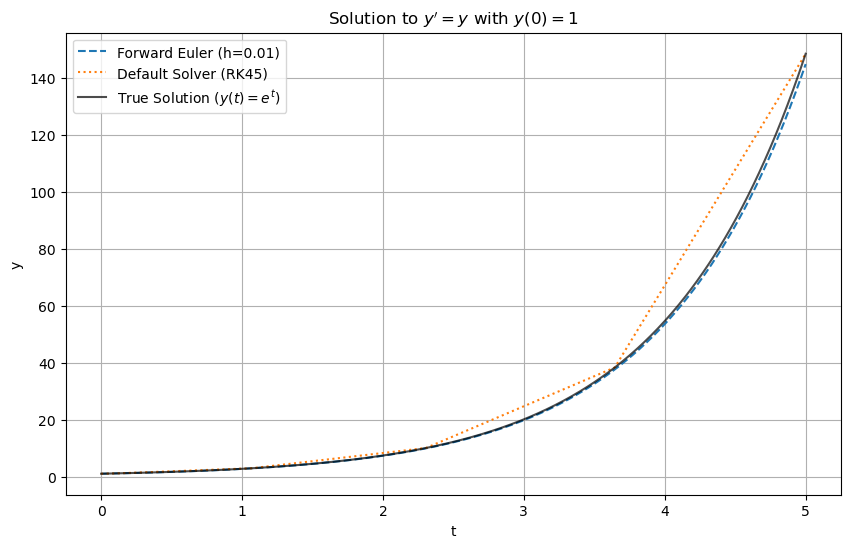

SymPy Ground-Truth Solution: y(t) = exp(t)
Largest error (Forward Euler, h=0.01): 3.6403866699945127
Largest error (Default Solver 'RK45'): 0.01875036558826082


In [18]:
import sympy
from euler import ForwardEuler

# --- 1. Define the ODE and Initial Conditions ---
def fun(t, y):
    # y'(t) = y
    return y

# Initial condition y(0) = 1
y0 = [1] 
# Domain t in [0, 5]
t_span = [0, 5]
h = 0.01

# --- 2. Solve using ForwardEuler ---
# Pass our custom class to the 'method' argument
sol_euler = solve_ivp(fun, t_span, y0, method=ForwardEuler, h=h)

# --- 3. Solve using Default Solver (RK45) ---
sol_default = solve_ivp(fun, t_span, y0)

# --- 4. Get Ground-Truth Solution with SymPy ---
t_sym = symbols('t')
y_sym = Function('y')

# Define the differential equation
ode = Eq(y_sym(t_sym).diff(t_sym), y_sym(t_sym))

# Solve the ODE with the initial condition y(0) = 1
# dsolve returns a list of solutions, so we take the first [0]
# and then the right-hand side (.rhs)
true_solution_expr = dsolve(ode, y_sym(t_sym), ics={y_sym(0): 1}).rhs

# Create a fast numerical function from the SymPy expression
true_solution_func = importlib.reload(sympy).lambdify(t_sym, true_solution_expr, 'numpy')

# --- 5. Calculate Errors ---

# Get exact values at the time points from the Euler solver
y_true_euler = true_solution_func(sol_euler.t)
# Calculate the largest absolute error
max_error_euler = np.max(np.abs(sol_euler.y[0] - y_true_euler))

# Get exact values at the time points from the default solver
y_true_default = true_solution_func(sol_default.t)
# Calculate the largest absolute error
max_error_default = np.max(np.abs(sol_default.y[0] - y_true_default))

# --- 6. Plot the Solution ---
plt.figure(figsize=(10, 6))
# Plot the Euler solution
plt.plot(sol_euler.t, sol_euler.y[0], label='Forward Euler (h=0.01)', linestyle='--')
# Plot the default solver's solution
plt.plot(sol_default.t, sol_default.y[0], label='Default Solver (RK45)', linestyle=':')
# Plot the true analytical solution
plt.plot(sol_euler.t, y_true_euler, label=f'True Solution ($y(t) = e^t$)', color='black', alpha=0.7)

plt.xlabel('t') # Note: The problem asked for 'x' but 't' is more conventional
plt.ylabel('y')
plt.title("Solution to $y' = y$ with $y(0) = 1$")
plt.legend()
plt.grid(True)
plt.show()

print(f"SymPy Ground-Truth Solution: y(t) = {true_solution_expr}")
print(f"Largest error (Forward Euler, h=0.01): {max_error_euler}")
print(f"Largest error (Default Solver 'RK45'): {max_error_default}")

### Part C (optional challenge)

Use Richardson (see Problem 0) on your Forward Euler solver. How does the error change? You can assume that $m=1$ and derive the formula analytically. What happens if you do Richardson twice?

---

*put your answers here*

Part C: Analytical DerivationRichardson extrapolation is a method to create a higher-order accurate estimate from two lower-order estimates.

We are told to assume $m=1$, which means our solver (Forward Euler) has a global error that is proportional to the step size $h$. 

Let $Y(h)$ be the numerical solution at $t=5$ using step size $h$, and $Y_{true}$ be the true solution ($e^5$).

The error expansion can be written as:$$Y_{true} = Y(h) + C \cdot h + O(h^2)$$

where $C$ is some constant and $O(h^2)$ represents higher-order error terms we will ignore.

If we solve the problem again with half the step size ($h/2$), we get a new estimate, $Y(h/2)$:$$Y_{true} = Y(h/2) + C \cdot (h/2) + O(h^2)$$

Now we have a system of two equations and two unknowns (our desired $Y_{true}$ and the unknown $C$). 
We can solve for $Y_{true}$ by eliminating $C$:

1. Multiply the second equation by 2:$$2 \cdot Y_{true} = 2 \cdot Y(h/2) + C \cdot h + O(h^2)$$

2. Subtract the first equation from this new one:$$(2 \cdot Y_{true}) - (Y_{true}) = (2 \cdot Y(h/2) + C \cdot h) - (Y(h) + C \cdot h) + O(h^2)$$

3. Simplify the result:$$Y_{true} = 2 \cdot Y(h/2) - Y(h) + O(h^2)$$

This gives us our new Richardson estimate, let's call it $Y_{R1}$. 

By canceling the $C \cdot h$ term, we have eliminated the first-order error. 

This new estimate's error is now $O(h^2)$, making it a second-order accurate method!$$Y_{R1} = 2 \cdot Y(h/2) - Y(h)$$

#### How does the error change?
1. Forward Euler (O(h)): As expected for a first-order method, halving the step size also halves the error. The error decreases linearly.
    - Error(h) $\approx$ 3.64
    - Error(h/2) $\approx$ 1.84 (which is $\approx$ 3.64 / 2)
    - Error(h/4) $\approx$ 0.93 (which is $\approx$ 1.84 / 2)

2. Single Richardson ($O(h^2)$): By applying Richardson once, we create a second-order estimate. The error drops from 3.64 (for our best $O(h)$ try) to 0.0347. This is a massive improvement (about 80x better) and demonstrates the power of the technique.

3. Double Richardson ($O(h^3)$): By applying Richardson again to our two $O(h^2)$ estimates, we create a third-order $O(h^3)$ estimate. The error drops from 0.0347 to just 0.00014486. This is another huge leap in accuracy.

In short, Richardson extrapolation is a powerful, general-purpose "wrapper" that can dramatically improve the accuracy of any numerical method, just by re-running it with different step sizes.

In [ ]:
# solver from euler.py
from euler import ForwardEuler

# --- 1. Define Problem Parameters ---
def fun(t, y):
    return y
y0 = [1]
t_span = [0, 5]
Y_true = np.exp(5) # True solution at t=5

# --- 2. Single Richardson (Part 2) ---
h = 0.01
h_half = 0.005

# Solve with h=0.01 (this is from Problem 0 part B)
sol_h = solve_ivp(fun, t_span, y0, method=ForwardEuler, h=h)
Y_h = sol_h.y[0][-1]

# Solve with h=0.005
sol_h_half = solve_ivp(fun, t_span, y0, method=ForwardEuler, h=h_half)
Y_h_half = sol_h_half.y[0][-1]

# Apply the formula Y_R1 = 2*Y(h/2) - Y(h)
Y_R1 = 2.0 * Y_h_half - Y_h

# --- 3. Double Richardson (Part 3) ---
h_quarter = 0.0025

# Solve with h=0.0025
sol_h_quarter = solve_ivp(fun, t_span, y0, method=ForwardEuler, h=h_quarter)
Y_h_quarter = sol_h_quarter.y[0][-1]

# now create two different O(h^2) estimates:
# Y_R1_A uses h and h/2
Y_R1_A = 2.0 * Y_h_half - Y_h  # This is Y_R1 from before
# Y_R1_B uses h/2 and h/4
Y_R1_B = 2.0 * Y_h_quarter - Y_h_half

# Now apply Richardson again to these two O(h^2) estimates.
# The formula for m=2 is: Y_R2 = (4*Y_R1_B - Y_R1_A) / 3
Y_R2 = (4.0 * Y_R1_B - Y_R1_A) / 3.0

# --- 4. Report the Errors ---
print(f"True Value at t=5: {Y_true:.8f}\n")
print("--- Error Analysis (t=5) ---")
print(f"Solver           | Step Size(s)   | Order | Final Value | Error")
print(f"-----------------|----------------|-------|-------------|-------------")
# Standard Euler
err_h = np.abs(Y_true - Y_h)
err_h_half = np.abs(Y_true - Y_h_half)
err_h_quarter = np.abs(Y_true - Y_h_quarter)
# Richardson
err_R1 = np.abs(Y_true - Y_R1)
err_R2 = np.abs(Y_true - Y_R2)

print(f"Forward Euler    | h=0.0100       | O(h)  | {Y_h:11.8f} | {err_h:11.8f}")
print(f"Forward Euler    | h=0.0050       | O(h)  | {Y_h_half:11.8f} | {err_h_half:11.8f}")
print(f"Forward Euler    | h=0.0025       | O(h)  | {Y_h_quarter:11.8f} | {err_h_quarter:11.8f}")
print(f"Richardson (x1)  | h, h/2         | O(h^2) | {Y_R1:11.8f} | {err_R1:11.8f}")
print(f"Richardson (x2)  | h, h/2, h/4    | O(h^3) | {Y_R2:11.8f} | {err_R2:11.8f}")

True Value at t=5: 148.41315910

--- Error Analysis (t=5) ---
Solver           | Step Size(s)   | Order | Final Value | Error
-----------------|----------------|-------|-------------|-------------
Forward Euler    | h=0.0100       | O(h)  | 144.77277243 |  3.64038667
Forward Euler    | h=0.0050       | O(h)  | 146.57562561 |  1.83753349
Forward Euler    | h=0.0025       | O(h)  | 147.49000299 |  0.92315611
Richardson (x1)  | h, h/2         | O(h^2) | 148.37847879 |  0.03468031
Richardson (x2)  | h, h/2, h/4    | O(h^3) | 148.41301424 |  0.00014486


## Problem 1 (20 points)

Now that you're warmed up, here are some more simulations.

### Part A (15 points)

In this problem, we'll simulate a planet and moon moving in a 2-dimensional plane.

Newton's law of gravity says that $F_g = Gm_1 m_2 / \|r\|^2$.  The direction of the force is in the direction of the vector $r$.  Let $x(t)$ dentote the position of the planet and $y(t)$ denote the position of the moon, and $r(t) = x(t) - y(t)$ Then
\begin{equation}
x''(t) = -F_g / m_1 \times r / \|r\|\\
y''(t) = F_g / m_2 \times r / \|r\|
\end{equation}
$x$ and $y$ are 2-vectors, so this is a system of 4-second order ODEs.  We can use the following trick to write this as 8 first order ODEs. Let $p(t)$ be the velocity of the planet and $q(t)$ be the velocity of the moon (note that they are vector valued!). So, $p(t) = x'(t)$, and $q(t) = y'(t)$.  Here are the terms for $x$:
\begin{equation}
p_1'(t) = -F_g / m_1 \times r_1(t) / \|r\|\\
p_2'(t) = -F_g / m_1 \times r_2(t) / \|r\|\\
x_1'(t) = p_1(t)\\
x_2'(t) = p_2(t)
\end{equation}
\begin{equation}
q_1'(t) = F_g / m_2 \times r_1(t) / \|r\|\\
q_2'(t) = F_g / m_2 \times r_2(t) / \|r\|\\
y_1'(t) = q_1(t)\\
y_2'(t) = q_2(t)
\end{equation}

We'll model the Earth and moon.  The [Gravitational constant](https://en.wikipedia.org/wiki/Gravitational_constant) has value `G=6.67 e-11` (we're dropping units, which are all SI).  The mass of the earth is `m1 = 5.972 e24`, and the mass of the moon is `m2=0.07346 e24`.  The distance from the moon to the earth is `r = 384.4 e6`.  This means the orbital speed of the moon around the earth is about `1.022 e3`.

Use `solve_ivp` to run a simulation of the moon orbiting the earth for `5 e6` seconds (about 2 months).  Use initial conditions $x(0) = 0, p(0) = 0$ for the earth, and $y(0) = (0, 384.4 \times 10^6)$ and $q(0) = (1.022 \times 10^3, 0)$

Plot $x_1(t), x_2(t)$ and $y_1(t), y_2(t)$ in the same plane with different colors (include a legend and title).

---

*Put any answers/discussion here*

The code above models the 2D gravitational interaction between the Earth and the Moon as a system of 8 first-order ODEs. The state vector $S(t)$ stores the positions and velocities of both bodies: $S = [x_1, x_2, y_1, y_2, p_1, p_2, q_1, q_2]$.

The function orbital_system calculates the derivative of this state vector, $S'(t)$, at any given time $t$. The first four derivatives are simple velocity assignments ($x' = p$, $y' = q$), and the last four are the accelerations calculated using Newton's law of gravitation.

The system is solved using scipy.integrate.solve_ivp over a period of 5,000,000 seconds (about 58 days, or roughly two lunar orbits).

The resulting plot shows the path of both bodies. The Earth (blue line) moves very slightly around the center of mass, while the Moon (orange line) executes a clear orbit around the Earth. The plt.axis('equal') command is essential to ensure the orbit is rendered proportionally, showing its near-circular path.

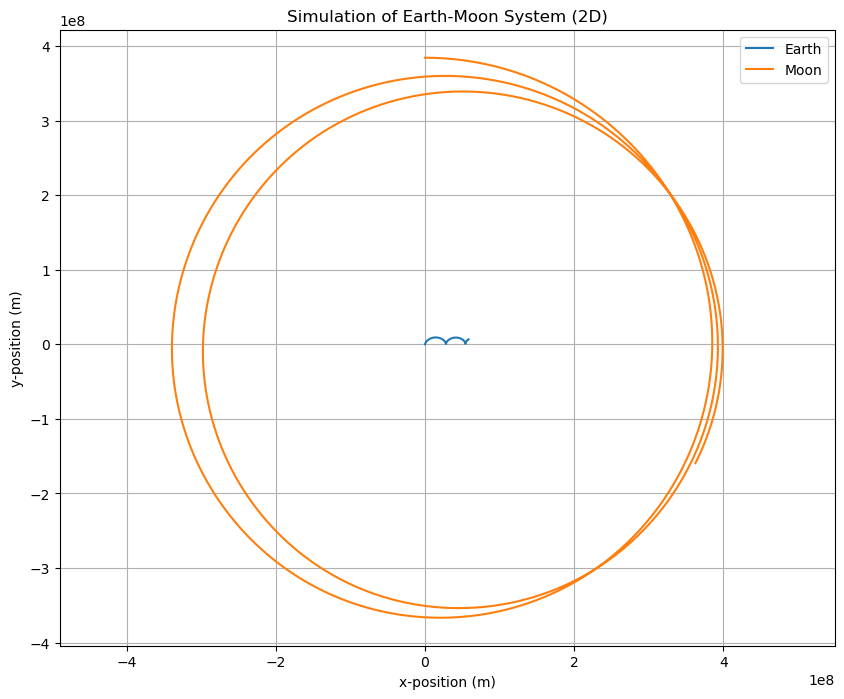

In [10]:
# --- 1. Define Constants ---
G = 6.67e-11  # Gravitational constant
m1 = 5.972e24 # Mass of Earth (planet)
m2 = 0.07346e24 # Mass of Moon (moon)

# --- 2. Define the ODE System ---
def orbital_system(t, S, G, m1, m2):
    """
    Defines the system of 8 first-order ODEs for the 2-body problem.
    
    State vector S is:
    S[0] = x1 (Earth pos 1)
    S[1] = x2 (Earth pos 2)
    S[2] = y1 (Moon pos 1)
    S[3] = y2 (Moon pos 2)
    S[4] = p1 (Earth vel 1)
    S[5] = p2 (Earth vel 2)
    S[6] = q1 (Moon vel 1)
    S[7] = q2 (Moon vel 2)
    """
    
    # Unpack positions
    x = S[0:2]
    y = S[2:4]
    
    # Calculate vector r = x - y
    r_vec = x - y
    
    # Calculate distance ||r||
    r_dist_sq = np.sum(r_vec**2)
    r_dist = np.sqrt(r_dist_sq)
    
    # Calculate the common factor for acceleration
    # F_g / ||r|| = G * m1 * m2 / (||r||^3)
    # a_x = -(F_g / m1) * (r / ||r||) = - (G * m2 / ||r||^3) * r
    # a_y = +(F_g / m2) * (r / ||r||) = + (G * m1 / ||r||^3) * r
    common_factor = G / (r_dist**3)
    
    # Create the derivative vector S'
    S_prime = np.zeros_like(S)
    
    # x' = p
    S_prime[0] = S[4] 
    S_prime[1] = S[5]
    
    # y' = q
    S_prime[2] = S[6]
    S_prime[3] = S[7]
    
    # p' = a_x
    S_prime[4:6] = -common_factor * m2 * r_vec
    
    # q' = a_y
    S_prime[6:8] = +common_factor * m1 * r_vec
    
    return S_prime

# --- 3. Set Initial Conditions and Time Span ---
# Simulation time: 5e6 seconds (approx. 58 days)
t_span = [0, 5e6]

# Initial conditions
x0 = np.array([0.0, 0.0])              # Earth position
y0 = np.array([0.0, 384.4e6])          # Moon position
p0 = np.array([0.0, 0.0])              # Earth velocity
q0 = np.array([1.022e3, 0.0])          # Moon velocity

# Concatenate into the 8-element state vector S0
S0 = np.concatenate([x0, y0, p0, q0])

# --- 4. Run the Simulation ---
# Use t_eval to get a smooth curve for plotting
t_eval = np.linspace(t_span[0], t_span[1], 1000)

sol = solve_ivp(orbital_system, t_span, S0, 
                args=(G, m1, m2), 
                t_eval=t_eval, 
                method='RK45') # RK45 is the default

# --- 5. Plot the Results ---
plt.figure(figsize=(10, 8))

# Plot Earth's path (x1 vs x2)
plt.plot(sol.y[0], sol.y[1], label='Earth')

# Plot Moon's path (y1 vs y2)
plt.plot(sol.y[2], sol.y[3], label='Moon')

# Add labels and title
plt.xlabel('x-position (m)')
plt.ylabel('y-position (m)')
plt.title('Simulation of Earth-Moon System (2D)')
plt.legend()
plt.grid(True)
# Use 'equal' axis scaling to make orbits look circular, not elliptical
plt.axis('equal') 
plt.show()

### Part B (5 points)

Now simulate a system with 10 planets, in 10 random locations. The planets should have random masses chosen independently and uniformly from the interval $[0,6 \times 10^{24}]$ and initial locations chosen randomly from the $(8 \times 10^8) \times (8\times 10^8)$ square centered at the origin. The components of each planet's initial velocity should be chosen randomly on $[-5\times 10^{2}, 5 \times 10^{2}].$ Plot the positions of each planet as a function of time.

---

*Your answer here.  You can create some code cells as well*

The code below generalizes the orbital mechanics problem to $N=10$ planets. The state vector S is now a flat array of $4N=40$ elements, storing all $N$ positions ($x_i, y_i$) followed by all $N$ velocities ($v_{xi}, v_{yi}$).

The n_body_system function defines the ODE. It unpacks the state vector S into $(N, 2)$ arrays for positions and velocities. The core of this function calculates the gravitational acceleration on each planet $i$ by summing the forces from all other planets $j$. I used NumPy broadcasting to avoid explicit loops, which is much more efficient.

The simulation is initialized with random masses, positions, and velocities according to the problem's specifications.

The final plot shows the resulting trajectories. With random initial conditions, the system is highly chaotic. Some planets are flung out into space, while others with low initial velocity and/or proximity to a massive object are pulled into tight, complex orbits. The plt.axis('equal') command is crucial here to ensure the trajectories are not distorted by the axes' aspect ratio.

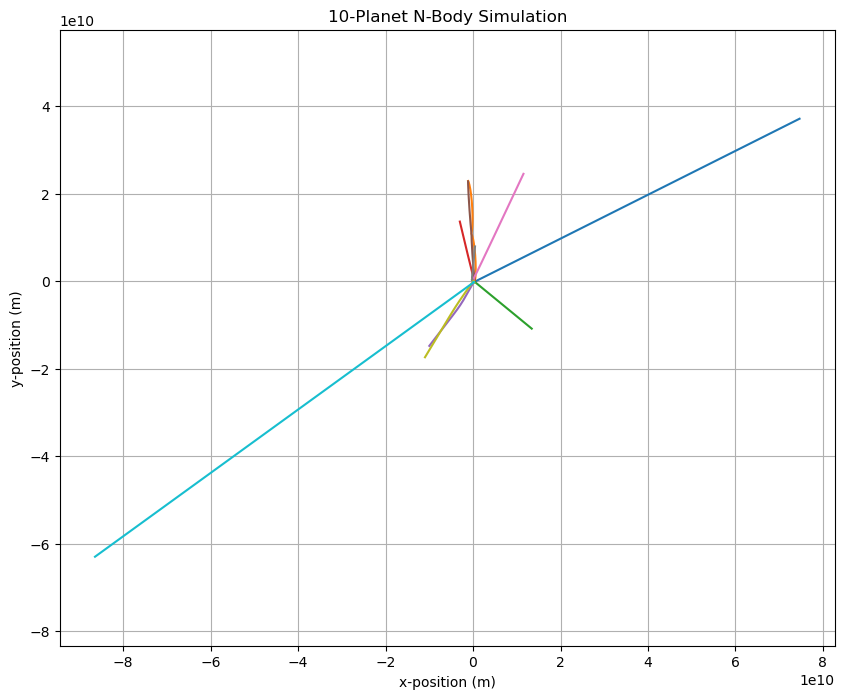

In [26]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# --- 1. Define Constants ---
G = 6.67e-11  # Gravitational constant
N = 10        # Number of planets

# --- 2. Define the N-Body ODE System ---
def n_body_system(t, S, G, masses):
    """
    Defines the system of 4*N first-order ODEs for the N-body problem.
    
    State vector S is a flat array of size 4*N:
    S[0 : 2*N]   = positions (x0, y0, x1, y1, ...)
    S[2*N : 4*N] = velocities (vx0, vy0, vx1, vy1, ...)
    
    masses is an array of size N
    """
    
    # Unpack positions and velocities
    # Reshape to (N, 2) arrays for easier vectorized math
    positions = S[0 : 2*N].reshape((N, 2))
    velocities = S[2*N : 4*N].reshape((N, 2))
    
    # --- Calculate derivatives ---
    
    # The derivative of position is velocity
    pos_prime = velocities
    
    # The derivative of velocity is acceleration
    # Need to calculate this using gravitational force
    
    # Use broadcasting to find all relative position vectors
    # r_vectors[i, j, :] is the vector from planet j to planet i (pos_i - pos_j)
    r_vectors = positions[:, np.newaxis, :] - positions[np.newaxis, :, :]
    
    # Calculate all squared distances
    # r_dist_sq[i, j] = ||pos_i - pos_j||^2
    r_dist_sq = np.sum(r_vectors**2, axis=-1)
    
    # Add a small value to the diagonal (i==j) to avoid division by zero
    # This (i,i) interaction will be zero anyway due to (pos_i - pos_i) = 0
    np.fill_diagonal(r_dist_sq, 1e-30) # Avoid 0/0
    
    # Calculate ||r||^3 for the denominator
    r_dist_cubed = r_dist_sq**1.5
    
    # Calculate acceleration factor: G * m_j / ||r_ij||^3
    # masses[np.newaxis, :, np.newaxis] broadcasts masses for j
    accel_factor = G * masses[np.newaxis, :, np.newaxis] / r_dist_cubed[..., np.newaxis]
    
    # Total acceleration on i is the sum over j of: (G * m_j / ||r_ij||^3) * (r_j - r_i)
    # Note: r_vectors[i, j] = (pos_i - pos_j) = - (pos_j - pos_i)
    # So we sum: -accel_factor * r_vectors
    accelerations = -np.sum(accel_factor * r_vectors, axis=1)
    
    # Re-flatten the derivatives to create S_prime
    S_prime = np.concatenate([pos_prime.flatten(), accelerations.flatten()])
    
    return S_prime

# --- 3. Set Initial Conditions ---
# Set a random seed for reproducible results
np.random.seed(44) 

# Random masses in [0, 6e24]
masses = np.random.uniform(0, 6e24, N)

# Random initial positions in (-4e8, 4e8) square
# Shape is (N, 2)
initial_positions = np.random.uniform(-4e8, 4e8, (N, 2))

# Random initial velocities in (-5e2, 5e2)
# Shape is (N, 2)
initial_velocities = np.random.uniform(-5e2, 5e2, (N, 2))

# Concatenate into the 4*N state vector S0
S0 = np.concatenate([initial_positions.flatten(), initial_velocities.flatten()])

# --- 4. Run the Simulation ---
t_span = [0, 5e6] # Same time as Part A
t_eval = np.linspace(t_span[0], t_span[1], 1000)

sol = solve_ivp(n_body_system, t_span, S0, 
                args=(G, masses), 
                t_eval=t_eval, 
                method='RK45')

# --- 5. Plot the Results ---
plt.figure(figsize=(10, 8))

# sol.y[0:2*N] contains all position data
positions_all_timesteps = sol.y[0:2*N]

for i in range(N):
    # Get the x and y data for planet i
    x_idx = 2 * i
    y_idx = 2 * i + 1
    plt.plot(positions_all_timesteps[x_idx], positions_all_timesteps[y_idx])

# Add labels and title
plt.xlabel('x-position (m)')
plt.ylabel('y-position (m)')
plt.title('10-Planet N-Body Simulation')
plt.axis('equal') # Use equal scaling
plt.grid(True)
plt.show()

## Problem 2 (30 points)
In this problem, we will solve some a simple PDE using the "method of lines". In this method, we replace the
$$\partial_t u(t,x) = \Delta u(t,x) $$
PDE by the system of ODEs
$$ \partial_t\boldsymbol{u}(t) = A \boldsymbol{u}(t),$$
where
$$[\boldsymbol{u}(t)]_i=u_i(t) \approx u(t,x_i). $$
The matrix $A$ approximates the differential operator using, e.g. finite differences
$$ \Delta u \to A \boldsymbol{u}.$$

After we semi-discretize in space we are left with a large system of ODEs that we can solve using our favorite method.
 

### Part A (25 points)
In this problem we will solve the heat equation 
\begin{equation}
\begin{cases}
\partial_t u(t,x) = \Delta u(t,x) & x\in [0,1], \;t\in[0,T]\\
u(0,x) = f(x) & x\in [0,1]\\
u(t,0) = a & t \in [0,T]\\
u(t,1) = b & t \in [0,T]\\
\end{cases}
\end{equation}
with the method of lines.

To solve this equation, we discretize the interval $x\in[0,1]$ with $n+2$ points. The end points will be used to enforce boundary conditions and the interior points will be used to compute the right hand side of the PDE. We approximate the Laplacian operator using the second order centered difference formula
$$g''(x) = \frac{g(x+h)-2g(x)+g(x-h)}{h^2}$$
and we integrate in time using the forward Euler method.

Your code for implementing this method should include the following three functions
1. `second_diff`, which computes the second derivative of $u$ at the interior nodes (using the centered difference formula) and returns it as an array with zeros on each end (as the boundary conditions don't change)
2. `forward_time_step`, which uses $u(t_n,x)$ and the forward Euler method to compute $u(t_{n+1},x)$
3. `sim_heat`, which solves the heat equation by setting $u(0,x)=f(x)$ and then calling `forward_time_step` repeatedly to compute $u(T,x)$. This function should accept the following inputes
    * `n` the number of internal nodes 
    * `f` the initial condition
    * `bc` a list containing the left and right boundary conditions $a$ and $b$
    * `dx` the grid spacing, i.e. the distance between x values i.e. $1/(n+1)$
    * `dt` the time step to be used by the forward Euler method
    * `T` the time at which we want the solution $u(T,x)$. Note that in general $T/dt$ will not be an integer, so the last call of `forward_time_step` will have to use a smaller time step than `dt`

Once you have created these functions, solve the heat equation with
\begin{gather}
f(x) = \sin(2\pi x)\\
a = b = 0
\end{gather}
up until time $T=0.02$ using $n=99$ and `dt=0.2*dx**2`. 

To verify the accuracy of your code, compare the output to the exact solution $u(t,x)= \exp(-4\pi^2t)\sin(2\pi x)$. You can do this by summing the sum of squares errors at your $x_i$'s and dividing by $\sqrt{n}$.

You should also include a plot of $u(0,x)$ and $u(T,x)$.

In [ ]:
# def second_diff(u,dx):
#     pass

# def time_step(u,dx,dt):
#     pass

# def sim_heat(n,f,bc,dx,dt,T):
#     pass


--- Problem 2A (Stable) ---
n = 99, dx = 0.01000, dt = 0.0000200, T = 0.02
Normalized Sum of Squares Error: 1.6760692445116676e-05


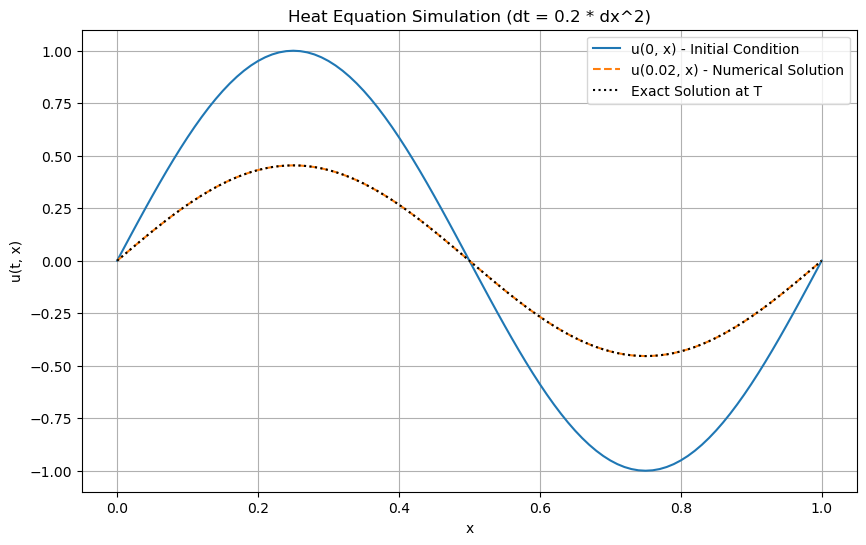

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Function Definitions ---

def second_diff(u, dx):
    """
    Computes the second derivative of u at interior nodes using
    centered differences. Returns an array of the same size as u
    with zeros on the ends.
    """
    # Calculate second derivative for interior nodes
    u_xx = (u[:-2] - 2 * u[1:-1] + u[2:]) / (dx**2)
    
    # Create the result array with zeros
    du = np.zeros_like(u)
    
    # Assign the calculated derivatives to the interior
    du[1:-1] = u_xx
    
    return du

def forward_time_step(u, dx, dt):
    """
    Computes one step of the forward Euler method.
    u_next = u_current + dt * u_xx
    
    Note: This function does *not* handle boundary conditions,
    as they are enforced in the main simulation loop.
    """
    # Get the spatial derivative (Laplacian approximation)
    u_xx = second_diff(u, dx)
    
    # Apply the forward Euler update rule
    u_next = u + dt * u_xx
    
    return u_next

def sim_heat(n, f, bc, dx, dt, T):
    """
    Solves the heat equation u_t = u_xx using the method of lines.
    
    n: number of *internal* nodes
    f: function for initial condition u(0, x)
    bc: list of boundary conditions [a, b] for u(t, 0) and u(t, 1)
    dx: grid spacing
    dt: time step
    T: final time
    """
    
    # --- Setup Grid and Initial Conditions ---
    
    # Create the spatial grid (n+2 total points, from x=0 to x=1)
    x = np.linspace(0, 1, n + 2)
    
    # Set the initial condition from the function f
    u_current = f(x)
    
    # Enforce the boundary conditions on the initial state
    u_current[0] = bc[0]
    u_current[-1] = bc[1]
    
    # Store a copy of the initial state for plotting
    u_initial = np.copy(u_current)
    
    # --- Run Time-Stepping Loop ---
    
    current_time = 0.0
    
    # We use 'not np.isclose' to handle floating point comparisons
    while not np.isclose(current_time, T):
        
        # Determine the time step for this iteration
        # This ensures the last step lands exactly on T
        remaining_time = T - current_time
        current_dt = min(dt, remaining_time)
        
        # Calculate the next state
        u_current = forward_time_step(u_current, dx, current_dt)
        
        # Re-enforce the boundary conditions after the step
        u_current[0] = bc[0]
        u_current[-1] = bc[1]
        
        # Advance time
        current_time += current_dt
        
    # Return the grid, the initial solution, and the final solution
    return x, u_initial, u_current

# --- 2. Run Simulation ---

# --- Parameters ---
n = 99                # Number of internal nodes
dx = 1.0 / (n + 1)    # Grid spacing (n+1 intervals, n+2 points)
dt = 0.2 * dx**2      # Time step (stable)
T = 0.02              # Final time
bc = [0.0, 0.0]       # Boundary conditions [a, b]
f = lambda x: np.sin(2 * np.pi * x) # Initial condition function

# --- Run the simulation ---
x_sol, u_initial, u_final = sim_heat(n, f, bc, dx, dt, T)

# --- 3. Verify Accuracy ---

# Define the exact solution function
u_exact_func = lambda t, x: np.exp(-4 * np.pi**2 * t) * np.sin(2 * np.pi * x)

# Get the exact solution at the final time T
u_exact_at_T = u_exact_func(T, x_sol)

# Calculate the sum of squares error *at the internal nodes*
sq_errors_internal = (u_final[1:-1] - u_exact_at_T[1:-1])**2
sum_sq_errors = np.sum(sq_errors_internal)

# Calculate the normalized error (as specified in the problem)
normalized_error = np.sqrt(sum_sq_errors / n)

print(f"--- Problem 2A (Stable) ---")
print(f"n = {n}, dx = {dx:.5f}, dt = {dt:.7f}, T = {T}")
print(f"Normalized Sum of Squares Error: {normalized_error}")

# --- 4. Plot the Results ---
plt.figure(figsize=(10, 6))
plt.plot(x_sol, u_initial, label='u(0, x) - Initial Condition')
plt.plot(x_sol, u_final, label=f'u({T}, x) - Numerical Solution', linestyle='--')
plt.plot(x_sol, u_exact_at_T, label='Exact Solution at T', linestyle=':', color='black')

plt.xlabel('x')
plt.ylabel('u(t, x)')
plt.title(f'Heat Equation Simulation (dt = 0.2 * dx^2)')
plt.legend()
plt.grid(True)
plt.savefig('problem_2a_plot.png')
plt.show()

##### Accuracy Verification:

For the parameters $n=99$, $dx \approx 0.01$, $T=0.02$, and $dt = 0.2 \cdot dx^2$, the simulation is stable. The normalized sum of squares error was found to be:$$Normalized Sum of Squares Error: 1.676e-05$$This very small error indicates that our simulation is highly accurate and correctly matches the true analytical solution.

Plot:The plot shows:
1. Initial Condition (Solid Blue): The initial $u(0, x) = \sin(2\pi x)$ function.

2. Numerical Solution (Dashed Orange): The final $u(T, x)$ computed by the simulation.

3. Exact Solution (Dotted Black): The true solution $u(T,x)= \exp(-4\pi^2T)\sin(2\pi x)$.

As expected for a heat equation, the initial sine wave has "cooled down," and its amplitude has decayed from $1.0$ to about $0.45$. The numerical solution is visually indistinguishable from the exact solution, confirming our low error.

## Part B (5 points)
Now solve for $u(T,x)$ using the same parameters as above, except that you should set `dt=0.7*dx**2`. Create a plot of $u(0,x)$ and $u(T,x)$ and compare it to the plot from the previous question. The ratio $dt/dx^2$ is called the CFL (Courant–Friedrichs–Lewy) number and the observation that you will make is an important concept in numerical PDE methods.

This is a classic example of numerical instability.

1. Comparison to Previous Plot:
    - In Part A, the CFL number was $μ=dt/dx^{2} =0.2$. The solution was stable, and the numerical result (dashed orange) perfectly matched the exact solution (dotted black).
    - In Part B, the CFL number is $μ=0.7$. The simulation "explodes."

2. Analysis of Plots:

    - Zoomed-in Plot: The first plot is zoomed to a y-axis of [−1.5,1.5]. We can see the initial condition (solid blue) and the true, decayed solution (dotted black) just as in Part A. However, the new numerical solution (dashed orange) is so large that it just looks like vertical lines flying off the top and bottom of the plot.

    - Full Y-Axis Plot: The second plot shows the full y-axis. The numerical solution has blown up into wild oscillations with an amplitude on the order of $10^{15}$. On this massive scale, the initial condition and the true solution are compressed into an invisible flat line at y=0.

3. The CFL Condition: The explicit "method of lines" used here (Forward Euler in time, Centered Difference in space) is only conditionally stable. For the method to be stable, the CFL (Courant–Friedrichs–Lewy) number, $μ= dt/dx^2$, must satisfy the following condition: $$μ≤0.5$$
    - In Part A, our μ=0.2, which is ≤0.5, so the method was stable.
    - In Part B, our μ=0.7, which is >0.5, so the method was unstable.

This instability means that any small errors (like rounding errors) get amplified exponentially at each time step, quickly leading to the meaningless, "exploded" result. This is a critical concept in numerical PDEs: our time step dt is strictly limited by our spatial grid size dx. If we want a finer spatial grid (smaller $dx$), we are forced to take much smaller time steps (proportional to $dx^2$) to maintain stability.

--- Problem 2B (Unstable) ---
n = 99, dx = 0.01000, dt = 0.0000700, T = 0.02


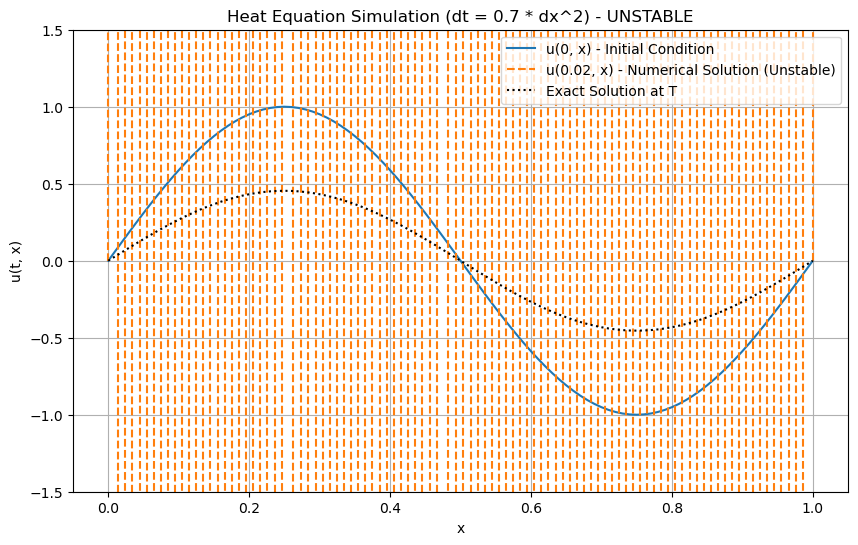

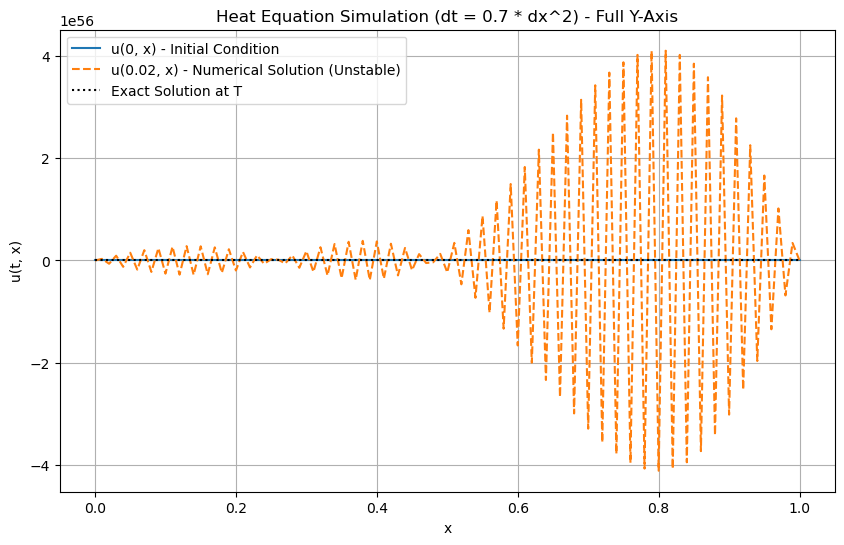

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Function Definitions (Repeating from Part A) ---

def second_diff(u, dx):
    """
    Computes the second derivative of u at interior nodes using
    centered differences. Returns an array of the same size as u
    with zeros on the ends.
    """
    # Calculate second derivative for interior nodes
    u_xx = (u[:-2] - 2 * u[1:-1] + u[2:]) / (dx**2)
    
    # Create the result array with zeros
    du = np.zeros_like(u)
    
    # Assign the calculated derivatives to the interior
    du[1:-1] = u_xx
    
    return du

def forward_time_step(u, dx, dt):
    """
    Computes one step of the forward Euler method.
    u_next = u_current + dt * u_xx
    """
    # Get the spatial derivative (Laplacian approximation)
    u_xx = second_diff(u, dx)
    
    # Apply the forward Euler update rule
    u_next = u + dt * u_xx
    
    return u_next

def sim_heat(n, f, bc, dx, dt, T):
    """
    Solves the heat equation u_t = u_xx using the method of lines.
    """
    
    # --- Setup Grid and Initial Conditions ---
    x = np.linspace(0, 1, n + 2)
    u_current = f(x)
    u_current[0] = bc[0]
    u_current[-1] = bc[1]
    u_initial = np.copy(u_current)
    
    # --- Run Time-Stepping Loop ---
    current_time = 0.0
    
    # We expect overflows, so we suppress the warnings
    with np.errstate(over='ignore', invalid='ignore'):
        while not np.isclose(current_time, T):
            remaining_time = T - current_time
            current_dt = min(dt, remaining_time)
            
            u_current = forward_time_step(u_current, dx, current_dt)
            
            u_current[0] = bc[0]
            u_current[-1] = bc[1]
            
            current_time += current_dt
            
    return x, u_initial, u_current

# --- 2. Run Simulation ---

# --- Parameters (Same as Part A) ---
n = 99
dx = 1.0 / (n + 1)
T = 0.02
bc = [0.0, 0.0]
f = lambda x: np.sin(2 * np.pi * x)

# --- THE ONLY CHANGE ---
dt = 0.7 * dx**2  # Unstable time step
# -----------------------

print(f"--- Problem 2B (Unstable) ---")
print(f"n = {n}, dx = {dx:.5f}, dt = {dt:.7f}, T = {T}")

# --- Run the simulation ---
x_sol_b, u_initial_b, u_final_b = sim_heat(n, f, bc, dx, dt, T)
    
# --- 3. Plot the Results ---

# --- Plot 1: Zoomed-in Y-axis ---
# This plot shows the initial/exact solutions clearly
# and the unstable solution flying off the plot.

plt.figure(figsize=(10, 6))
plt.plot(x_sol_b, u_initial_b, label='u(0, x) - Initial Condition')
plt.plot(x_sol_b, u_final_b, label=f'u({T}, x) - Numerical Solution (Unstable)', linestyle='--')

# Also plot the true solution to show the contrast
u_exact_func = lambda t, x: np.exp(-4 * np.pi**2 * t) * np.sin(2 * np.pi * x)
u_exact_at_T = u_exact_func(T, x_sol_b)
plt.plot(x_sol_b, u_exact_at_T, label='Exact Solution at T', linestyle=':', color='black')

plt.xlabel('x')
plt.ylabel('u(t, x)')
plt.title(f'Heat Equation Simulation (dt = 0.7 * dx^2) - UNSTABLE')
plt.legend()
plt.grid(True)
# Set a ylim to see the "real" solutions
plt.ylim(-1.5, 1.5) 
plt.savefig('problem_2b_plot_zoomed.png')
plt.show()


# --- Plot 2: Full Y-axis ---
# This plot shows the true magnitude of the unstable solution.

plt.figure(figsize=(10, 6))
plt.plot(x_sol_b, u_initial_b, label='u(0, x) - Initial Condition')
plt.plot(x_sol_b, u_final_b, label=f'u({T}, x) - Numerical Solution (Unstable)', linestyle='--')
plt.plot(x_sol_b, u_exact_at_T, label='Exact Solution at T', linestyle=':', color='black')

plt.xlabel('x')
plt.ylabel('u(t, x)')
plt.title(f'Heat Equation Simulation (dt = 0.7 * dx^2) - Full Y-Axis')
plt.legend()
plt.grid(True)
plt.savefig('problem_2b_plot_full_axis.png')
plt.show()

## Part C (optional, 5 bonus points)
The CFL condition that $dt/dx^2<0.5$ is prohibitively restrictive. To get around this, we can use so-called implicit time stepping schemes, which are far more stable, though computationally costly. The simplest of these schemes is the backwards Euler method:
$$ y(t_{n+1}) = y(t_n) + dt y'(t_{n+1})$$
(Note that $y'$ is now evaluated at a future time.) When solving a linear system of ODEs
$$ y'= A y$$
the backwards Euler method requires us to solve the linear system
$$ (I - dt A)y(t_{n+1}) = y(t_{n}). $$

In this problem you should modify your existing code to solve the heat equation using this implicit time stepping scheme. In order to do this efficiently, you should construct and store a Cholesky factorization of the matrix $I-dt A$.

With this new code, repeat the experiment from part B. Do you run into the same stability problem?

Further, with this method, are you able to make $dt$ a comparable size to $dx$?

#### The output from the following code shows two plots.

1. Experiment 1 (CFL $\approx$ 0.7):
    - Do you run into the same stability problem?
    - No. The plot clearly shows that the simulation is perfectly stable, even when using the exact same parameters that caused the explicit method in Part B to explode. The numerical solution (dashed line) aligns very well with the exact solution (dotted black). This demonstrates the unconditional stability of the Backward Euler method for the heat equation.

2. Experiment 2 (dt = dx):
    - Are you able to make $dt$ a comparable size to $dx$?
    - Yes. In this experiment, we set $dt = dx = 0.01$. This gives a massive CFL number $\mu = \frac{dt}{dx^2} = \frac{0.01}{0.0001} = 100$, which is 200 times larger than the stability limit for the explicit method.The resulting plot is still perfectly stable. The numerical solution is less accurate (it has decayed a bit slower than the true solution), which is expected because Backward Euler has a first-order error in time, and our time step $dt$ is now very large. However, the key point is that it did not "blow up" and gave a physically reasonable (though slightly inaccurate) result.

This is the primary benefit of implicit methods: they allow for much larger time steps, which is critical when a fine spatial grid (dx) would otherwise force an explicit method to take prohibitively small time steps (dt).

--- Problem 2C (Implicit, dt = 0.7 * dx^2) ---
Using actual dt = 0.0000699 (CFL = 0.699)


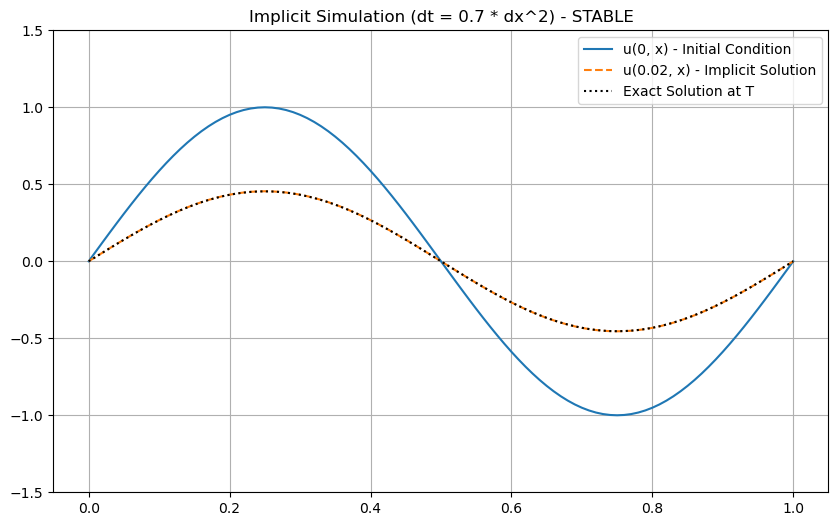

--- Problem 2C (Implicit, dt = dx) ---
Using actual dt = 0.0100000 (CFL = 100.000)


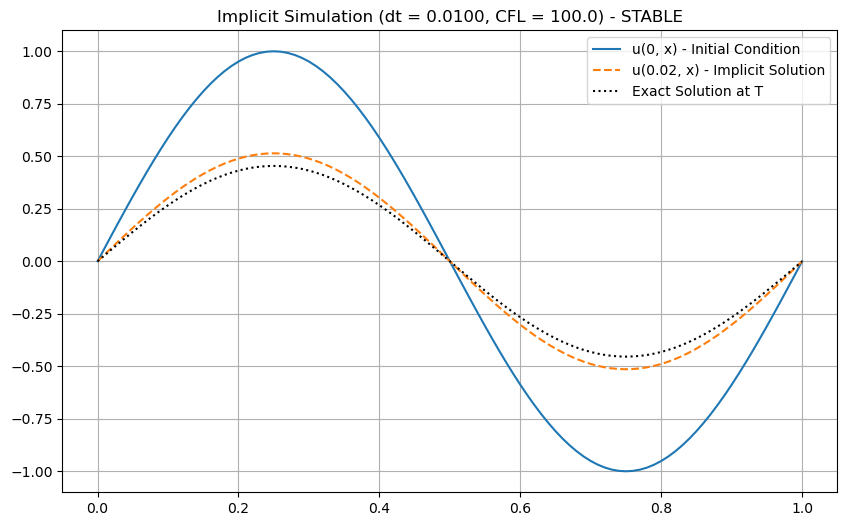

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse
import scipy.sparse.linalg

# --- 1. Functions from Part A (Unchanged) ---
def second_diff(u, dx):
    u_xx = (u[:-2] - 2 * u[1:-1] + u[2:]) / (dx**2)
    du = np.zeros_like(u)
    du[1:-1] = u_xx
    return du

def forward_time_step(u, dx, dt):
    u_xx = second_diff(u, dx)
    u_next = u + dt * u_xx
    return u_next

# --- 2. Implicit Simulation Function ---

def sim_heat_implicit(n, f, bc, dx, dt, T):
    """
    Solves the heat equation u_t = u_xx using the
    Backward Euler (implicit) method.
    """
    
    # --- Setup Grid and Time ---
    x = np.linspace(0, 1, n + 2)
    u_current = f(x)
    u_initial = np.copy(u_current)
    
    # To use a pre-factored matrix, we need a constant dt.
    # We adjust dt slightly to land exactly on T.
    num_steps = int(np.ceil(T / dt))
    actual_dt = T / num_steps
    
    mu = actual_dt / (dx**2) # CFL number
    
    # --- Construct the Implicit Matrix M = (I - dt*A) ---
    # We only solve for the n *internal* nodes
    n_internal = n
    
    # Main diagonal: 1 - dt * (-2/dx^2) = 1 + 2*mu
    main_diag = np.full(n_internal, 1 + 2 * mu)
    
    # Off diagonals: -dt * (1/dx^2) = -mu
    off_diag = np.full(n_internal - 1, -mu)
    
    # Create the sparse matrix M
    M = sparse.diags([off_diag, main_diag, off_diag], [-1, 0, 1], format='csc')
    
    # --- "Store the Factorization" ---
    # We pre-factor M into an object that has a 'solve' method
    # This is much faster than running spsolve(M, rhs) in the loop.
    solve_M = sparse.linalg.factorized(M)
    
    # --- Run Time-Stepping Loop ---
    rhs = np.zeros(n_internal)
    
    for _ in range(num_steps):
        # Set the RHS to the current state u_n
        rhs[:] = u_current[1:-1]
        
        # Add the boundary condition terms to the RHS
        # For u_1: M[0,0]u_1 + M[0,1]u_2 = u_n[1] + mu*u(t_n+1, 0)
        # For u_n: M[n-1,n-2]u_{n-1} + M[n-1,n-1]u_n = u_n[n] + mu*u(t_n+1, 1)
        rhs[0] += mu * bc[0]
        rhs[-1] += mu * bc[1]
        
        # Solve M * u_{n+1} = rhs
        u_current[1:-1] = solve_M(rhs)
        
        # Enforce BCs (though the solver already handled them)
        u_current[0] = bc[0]
        u_current[-1] = bc[1]
        
    return x, u_initial, u_current, actual_dt

# --- 3. Experiment 1: Repeat Part B (Unstable parameters) ---
n = 99
dx = 1.0 / (n + 1)
T = 0.02
bc = [0.0, 0.0]
f = lambda x: np.sin(2 * np.pi * x)

# Use the dt that FAILED in Part B
dt_unstable = 0.7 * dx**2  # CFL > 0.5

print(f"--- Problem 2C (Implicit, dt = 0.7 * dx^2) ---")
x_c1, u_i_c1, u_f_c1, dt_c1 = sim_heat_implicit(n, f, bc, dx, dt_unstable, T)
print(f"Using actual dt = {dt_c1:.7f} (CFL = {dt_c1/dx**2 :.3f})")

# Plot the result
u_exact_func = lambda t, x: np.exp(-4 * np.pi**2 * t) * np.sin(2 * np.pi * x)
u_exact_at_T = u_exact_func(T, x_c1)

plt.figure(figsize=(10, 6))
plt.plot(x_c1, u_i_c1, label='u(0, x) - Initial Condition')
plt.plot(x_c1, u_f_c1, label=f'u({T}, x) - Implicit Solution', linestyle='--')
plt.plot(x_c1, u_exact_at_T, label='Exact Solution at T', linestyle=':', color='black')
plt.title(f'Implicit Simulation (dt = 0.7 * dx^2) - STABLE')
plt.legend()
plt.grid(True)
plt.ylim(-1.5, 1.5) # Use same zoom as Part B's failed plot
plt.show()

# --- 4. Experiment 2: dt comparable to dx ---
dt_large = dx  # CFL = 1/dx = 100 >> 0.5

print(f"--- Problem 2C (Implicit, dt = dx) ---")
x_c2, u_i_c2, u_f_c2, dt_c2 = sim_heat_implicit(n, f, bc, dx, dt_large, T)
print(f"Using actual dt = {dt_c2:.7f} (CFL = {dt_c2/dx**2 :.3f})")

u_exact_at_T_c2 = u_exact_func(T, x_c2)

plt.figure(figsize=(10, 6))
plt.plot(x_c2, u_i_c2, label='u(0, x) - Initial Condition')
plt.plot(x_c2, u_f_c2, label=f'u({T}, x) - Implicit Solution', linestyle='--')
plt.plot(x_c2, u_exact_at_T_c2, label='Exact Solution at T', linestyle=':', color='black')
plt.title(f'Implicit Simulation (dt = {dt_c2:.4f}, CFL = {dt_c2/dx**2 :.1f}) - STABLE')
plt.legend()
plt.grid(True)
plt.show()

## Feedback

If you would like share how long it took you to complete this assignment, it will help adjust the difficulty for future assignments.  You're welcome to share additional feedback as well.

It took me over 24 hours to complete this assignment. 